In [13]:
# xmlrpc_client.ipynb

import xmlrpc.client as rpc
import pickle

server_proxy = rpc.ServerProxy("http://127.0.0.1:8010")

print('Ping:', server_proxy.execute('ping'))

print('Server datetime:', server_proxy.execute('now'))

print('View, type, value:', server_proxy.execute('type', 2))
print('View, type, value:', server_proxy.execute('type', 2.))
print('View, type, value:', server_proxy.execute('type', 'My string'))
print('View, type, value:', server_proxy.execute('type', "My string"))
print('View, type, value:', server_proxy.execute('type', [1, 2, 3]))
print('View, type, value:', server_proxy.execute('type', ["one", "two", "three"]))
print('View, type, value:', server_proxy.execute('type', (1, 2, "3")))

print('Sum 2 + 3 :', server_proxy.execute('sum', 2, 3))
print('Pow 2^3: ', server_proxy.execute('pow', 2, 3))

Ping: True
Server datetime: 20241219T19:11:23
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


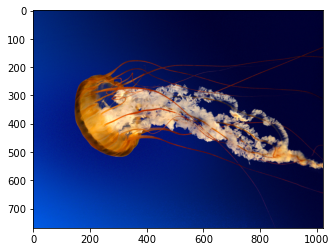

In [14]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc.client as rpc

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)
show()

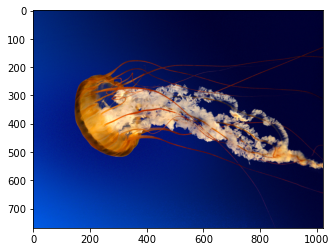

In [15]:
# Тест бинарной передачи данных
pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = rpc.Binary(pimg)

img_bin2 = server_proxy.execute('send_back_binary', img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)
show()

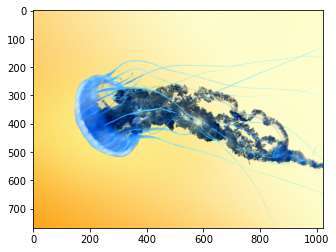

In [16]:
# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = rpc.Binary(pimg)
    
    img_bin2 = server_proxy.execute('color_inversion', img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)
show()

In [17]:
# Лабораторная 1. Задание 4. Проверка на наличие человека в черном списке с проверкой по ФИО и дате рождения

print(server_proxy.execute('black_list_check_by_name_and_birthday', 'Иванов', 'Иван', 'Иванович', '22.03.1989'))
print(server_proxy.execute('black_list_check_by_name_and_birthday', 'Иванов', 'Иван', 'Иванович', '23.03.1989'))

Иванов Иван Иванович 22.03.1989: bad_boy
Иванов Иван Иванович 23.03.1989: good_boy


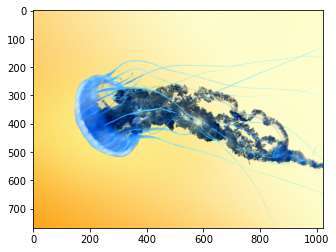

In [18]:
colored_img = 'Jellyfish.jpg'
monochrome_img = '11.bmp'

def show_modified_image(path, modify_func, param=None):
    img = Image.open(path)
    img_arr = array(img)
    pimg = pickle.dumps(img_arr)
    img_bin = rpc.Binary(pimg)
    if param is None:
        img_bin_out = server_proxy.execute(modify_func, img_bin)
    else:
        img_bin_out = server_proxy.execute(modify_func, img_bin, param)
    img_arr_out = pickle.loads(img_bin_out.data) 
    gray()
    imshow(img_arr_out)
    show()

# Лабораторная 1. Задание 5. Модифицировать функцию сервера send_back_inversion на корректную работу также с монохромными изображениями,
# т.е. входными данными могут быть размерности (M, N, 3) и (M, N, 1).

show_modified_image(colored_img, 'color_inversion')

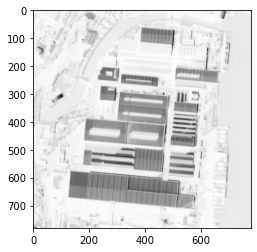

In [19]:
show_modified_image(monochrome_img, 'color_inversion')

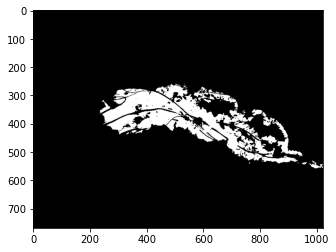

In [20]:
# Лабораторная 1. Задание 6. Функция бинаризации изображения по задаваемому порогу 1-255 для цветных и монохромных изображений

show_modified_image(colored_img, 'binarize_by_threshold', 100)

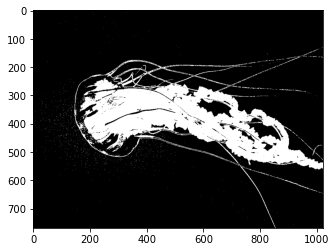

In [21]:
show_modified_image(colored_img, 'binarize_by_threshold', 10)

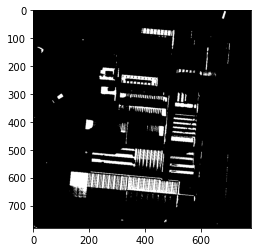

In [22]:
show_modified_image(monochrome_img, 'binarize_by_threshold', 100)

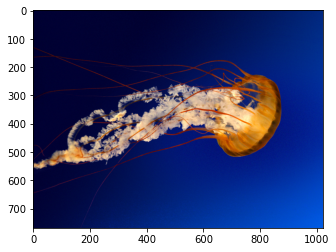

In [23]:
# Лабораторная 1. Задание 7. Функция разворота изображения относительно вертикали для цветных и монохромных изображений

show_modified_image(colored_img, 'mirror_vertically')

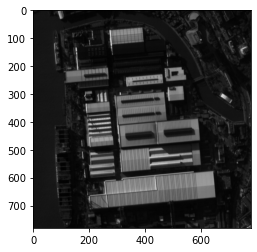

In [24]:
show_modified_image(monochrome_img, 'mirror_vertically')

In [41]:
# Лабораторная 2. Задание 4. Получение содержимого журнала событий сервера статистики
# с возможностью получения среза по типу выполняемой операции (события) и времени

import datetime

all_logs = server_proxy.get_logs_slice('all', '', '', '', 1)
sliced_logs = server_proxy.get_logs_slice('binarize_by_threshold', '2023-09-26 19:18:33', '', 10, 1)
print('All logs:\n' + (all_logs if isinstance(all_logs, str) else '\n'.join(map(str, all_logs))))
print('\nSliced logs:\n' + (sliced_logs if isinstance(sliced_logs, str) else '\n'.join(map(str, sliced_logs))))

All logs:
['mirror_vertically', '20241219T19:12:12', '4.024499']
['mirror_vertically', '20241219T19:12:13', '0.657244']

Sliced logs:



In [40]:
# Лабораторная 3. Задание 5. Получение содержимого журнала событий сервера статистики с возможностью получения среза
# по типу выполняемой функции, времени вызова и ее длительности

import datetime

all_logs = server_proxy.get_logs_slice('all', '', '', '', 2)
sliced_logs = server_proxy.get_logs_slice('color_inversion', '', '20241219T19:00:23', 10, 2)
print('All logs:\n' + (all_logs if isinstance(all_logs, str) else '\n'.join(map(str, all_logs))))
print('\nSliced logs:\n' + (sliced_logs if isinstance(sliced_logs, str) else '\n'.join(map(str, sliced_logs))))

All logs:
['ping', '20241219T16:03:59', 2.034764]
['now', '20241219T16:04:07', 2.037349]
['type', '20241219T16:04:15', 2.038876]
['type', '20241219T16:04:23', 2.032457]
['type', '20241219T16:04:31', 2.037999]
['type', '20241219T16:04:39', 2.043378]
['type', '20241219T16:04:48', 2.033668]
['type', '20241219T16:04:56', 2.019684]
['type', '20241219T16:05:04', 2.023792]
['sum', '20241219T16:05:12', 2.046032]
['pow', '20241219T16:05:20', 2.033363]
['send_back_binary', '20241219T16:07:42', 2.388521]
['color_inversion', '20241219T16:08:04', 14.627543]
['black_list_check_by_name_and_birthday', '20241219T16:08:13', 2.059591]
['black_list_check_by_name_and_birthday', '20241219T16:08:21', 2.041176]
['color_inversion', '20241219T16:08:41', 14.246291]
['color_inversion', '20241219T16:08:53', 5.115287]
['binarize_by_threshold', '20241219T16:09:13', 13.090437]
['binarize_by_threshold', '20241219T16:09:33', 13.182121]
['binarize_by_threshold', '20241219T16:09:44', 4.827354]
['mirror_vertically', '2024